In [6]:
%pylab inline
import scipy.ndimage
import time
import scipy.sparse.linalg
import scipy.stats
import seaborn as sns
import os

Populating the interactive namespace from numpy and matplotlib


In [7]:
def load_data(dataset):
    d = np.load(dataset)
    mask = ~(np.isclose(d['permeabilities_x'], 0) | np.isclose(d['permeabilities_y'], 0)) & ((d['permeabilities_y'] + d['permeabilities_x']) / 2 < 25)
    images = d['images'][mask]
    porosities = d['porosities'][mask]
    permeabilities = (d['permeabilities_x'][mask] + d['permeabilities_y'][mask]) / 2
    images = np.reshape(images,(*(images.shape), 1))
    d.close()
    return images, porosities.astype(np.float32), permeabilities.astype(np.float32)

In [8]:
images = []
porosities = []
permeabilities = []
datasets = os.listdir('datasetsXY')
for dataset in datasets:
    images_n, porosities_n, permeabilities_n = load_data('datasetsXY/' + dataset)
    images.append(images_n)
    porosities.append(porosities_n)
    permeabilities.append(permeabilities_n)
    
images = np.concatenate(images)
porosities = np.concatenate(porosities)
permeabilities = np.concatenate(permeabilities)

In [9]:
images.shape

(759089, 64, 64, 1)

In [7]:
permeabilities, indices = np.unique(permeabilities, axis=0, return_index=True)
porosities = porosities[indices]

In [8]:
images = images[indices]
images.shape

(753554, 64, 64, 1)

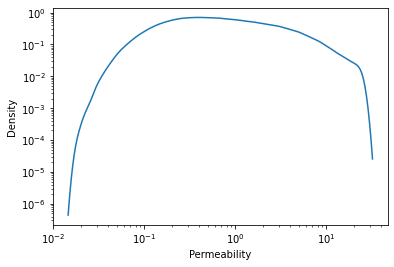

In [12]:
ax = sns.kdeplot(permeabilities, log_scale=(True, True));
ax.set(xlabel='Permeability');
plt.savefig('images/dataset_permeability_density.pdf')

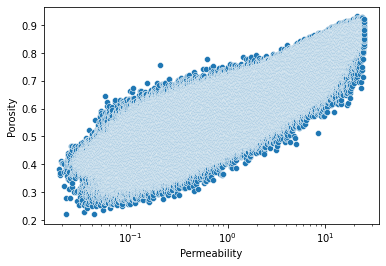

In [19]:
ax = sns.scatterplot(x = permeabilities[~np.isclose(permeabilities, 0)], y = porosities[~np.isclose(permeabilities, 0)]);
ax.set_xscale('log')
ax.set(xlabel='Permeability', ylabel = 'Porosity');
plt.savefig('images/permeability_porosity_scatter.png')

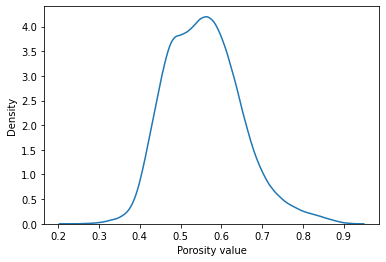

In [17]:
ax = sns.kdeplot(porosities, log_scale=(False, False));
ax.set(xlabel='Porosity value');
plt.savefig('images/dataset_porosity_density.pdf')

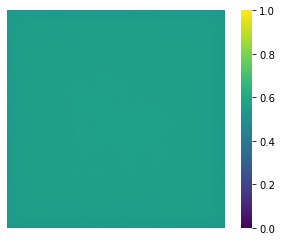

In [29]:
sns.heatmap(np.mean(images.reshape((images.shape[0],64,64)), axis=0), square = True, xticklabels = False, yticklabels = False, cmap = 'viridis', vmin=0, vmax=1);
plt.savefig('images/dataset_geometry_heatmap.png')

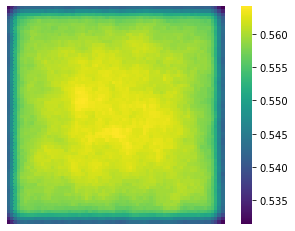

In [30]:
sns.heatmap(np.mean(images.reshape((images.shape[0],64,64)), axis=0), square = True, xticklabels = False, yticklabels = False, cmap = 'viridis');
plt.savefig('images/dataset_geometry_heatmap_normalised.png')

In [4]:
np.min(np.mean(images.reshape((images.shape[0],64,64)), axis=0))

0.5313145098927794

In [5]:
np.max(np.mean(images.reshape((images.shape[0],64,64)), axis=0))

0.5639654902126101

In [173]:
permeabilities_x.shape

(794270,)